# **DATA CLUSTER - NOTEBOOK**

## Objectives

* Fit and evaluate a cluster model to group similar data
* Understand the profile for each cluster

## Inputs

* outputs/datasets/collection/dataPP5_cleaned_10k.csv


## Outputs

* Cluster Pipeline
* Train set (features and target)
* Most important featurs to define a cluster plot
* Clusters Profile Description
* Silhouette

## Comments

* --


---

# Change working directory

* access the current directory
* make the parent of the current directory the new current directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/PP5_My_project'

---

# Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [92]:
%pip install --upgrade yellowbrick scikit-learn

Note: you may need to restart the kernel to use updated packages.


---

# Load Data

In [40]:
df = pd.read_csv('outputs/datasets/collection/dataPP5_cleaned_10k.csv').drop(labels=['DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'LAT', 'LON', 'Damage'], axis=1)
print(df.shape)
df.head(3)

(10000, 14)


,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount
0,2200,19,763,9,F,H,101.0,STREET,515.0,PHYSICAL PRESENCE,13500 SIMSHAW AV,NO CROSS STREET,6,0.0
1,1130,14,330,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0
2,2130,1,740,34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0


In [41]:
print(df.shape)

(10000, 14)


---

# Machine Learning Pipeline for Cluster

***n_components*** of PCA and ***n_clusters*** of KMeans updated later

In [44]:
from sklearn.pipeline import Pipeline

## Cleaning
from feature_engine.encoding import OrdinalEncoder

## Scaling
from sklearn.preprocessing import StandardScaler

## PCA
from sklearn.decomposition import PCA

## ML aLgorithm
from sklearn.cluster import KMeans

def LuxuriusCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                variables=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc',
                                                        'LOCATION', 'Cross Street'])),
        ("scaler", StandardScaler()),
        ("PCA", PCA(n_components=50, random_state=77)),
        ("model", KMeans(n_clusters=50, random_state=77)),
    ])
    return pipeline_base

LuxuriusCluster()


Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=50, random_state=77)),
                ('model', KMeans(n_clusters=50, random_state=77))])

---

# Principal Component Analysis (PCA)

* Let's transform the data and find out what feature explain the most variance
* PCA reduces the number of variable, while maintaining as much information as possible. 
* It is really useful since it reduces space and provide better formated data for grouping.

#### we will find the most suitable ***n_components*** and then update the pipeline
* to do that we remove the last two steps (PCA and model) off of the pipeline with ***.steps[:-2]
* then we use ***pipeline_pca*** to scale the data so that we can apply PCA afterwards

In [45]:
pipeline_cluster = LuxuriusCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df)

print(df_pca.shape, '\n', type(df_pca))


(10000, 14) 
 <class 'numpy.ndarray'>


In [46]:
# Set the number of components as all columns in the data, we are aiming for 90%
n_components = 11

# Set PCA object and fit to the data
pca = PCA(n_components=n_components).fit(df_pca)
# Array with transformed PCA
x_PCA = pca.transform(df_pca)

# the PCA object has .explained_variance_ratio_ attribute, which tells
# how much information (variance) each component has
# We store that to a DataFrame relating each component to its variance explanation
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_, 3),
    index=ComponentsList,
    columns=['Explained Variance Ratio %)']
)
# prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio %)'].sum()
# Display
print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)


* The 11 components explain 89.92% of the data 

              Explained Variance Ratio %)
Component 0                        14.245
Component 1                        11.542
Component 2                         8.822
Component 3                         7.819
Component 4                         7.251
Component 5                         7.209
Component 6                         7.076
Component 7                         6.729
Component 8                         6.585
Component 9                         6.451
Component 10                        6.193


In [48]:
# We rewrite the Cluster with the good number of n_components 11
from sklearn.pipeline import Pipeline

## Cleaning
from feature_engine.encoding import OrdinalEncoder

## Scaling
from sklearn.preprocessing import StandardScaler

## PCA
from sklearn.decomposition import PCA

## ML aLgorithm
from sklearn.cluster import KMeans

def LuxuriusCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                variables=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc',
                                                        'LOCATION', 'Cross Street'])),
        ("scaler", StandardScaler()),
        ("PCA", PCA(n_components=11, random_state=77)),
        ("model", KMeans(n_clusters=50, random_state=77)),
    ])
    return pipeline_base

LuxuriusCluster()


Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=11, random_state=77)),
                ('model', KMeans(n_clusters=50, random_state=77))])

---

# Elbow Method and Silhouette Score

We are looking for the best value for n_clusters.

In [49]:
# Prepare data for analysis
pipeline_cluster = LuxuriusCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1]) # one less step
df_analysis = pipeline_analysis.fit_transform(df)

print(df_analysis.shape, '\n', type(df_pca))

(10000, 11) 
 <class 'numpy.ndarray'>


### Next we use KElbowVisualizer() from YellowbrickElbow

we will use KMeans and pass the numbe of clusters we want to try, a tuple of (1,15) we the last value is not inclusive.

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

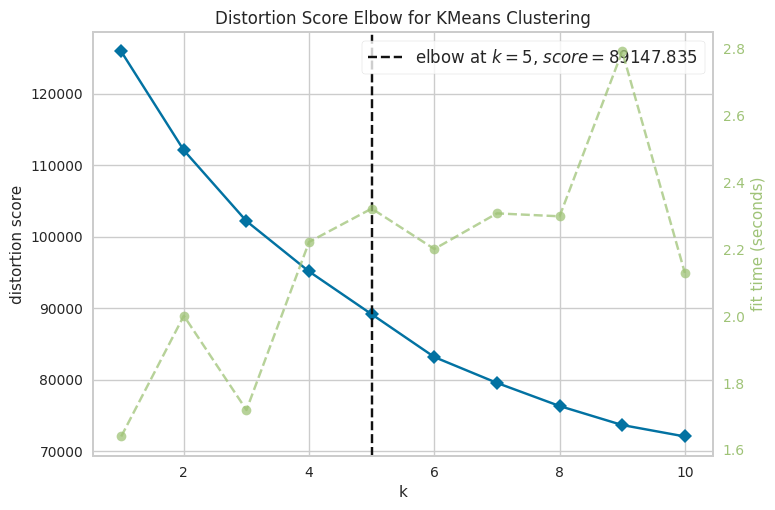

In [50]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=77), k=(1,11))
visualizer.fit(df_analysis)
visualizer.show()
plt.show()

### The plot suggests 5 clusters

# Silhouette score

Its score helps us figure out how well our data pints fit into their clusters, it mesures: 
* how close each point is to other points in its own group, **mean intra-cluster**.
* how far it is from points in the nearest different group, **mean nearest-cluster**.

Silhouette score: **-1** (wrong cluster) | **0** (border between clusters) | **+1** (well-clustered)

with an average silhouette score we can: 
* compare different models
* define a performance metric

### an average silhouette score **> 0.5** means the clusters are nicely separated. But it does not need to be so.

we will evaluate:
* if there are clusters with a **maximum** score **below average** score, 
* if the silhouette values **vary too much** in the cluster, 
* if there are **too many** silhouette values **lower than the average** silhouette score,
* and if there are **too many negative** silhouette values.

=== Average Silhouette Score for different number of clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

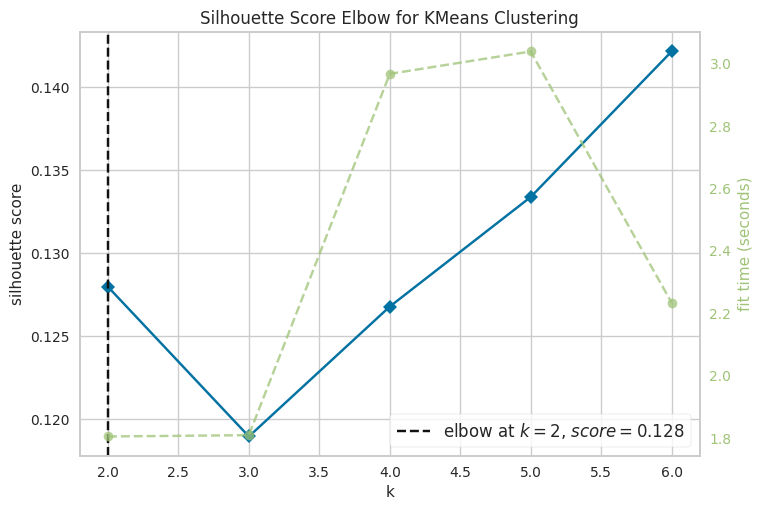



=== Silhouette plot for 2 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



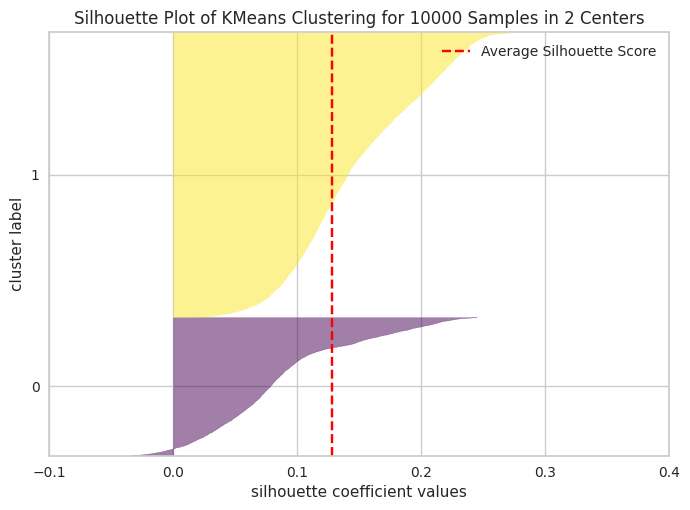



=== Silhouette plot for 3 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



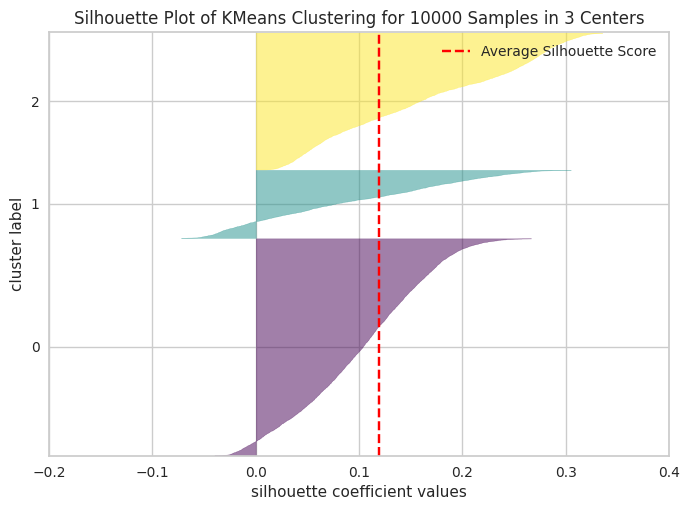



=== Silhouette plot for 4 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



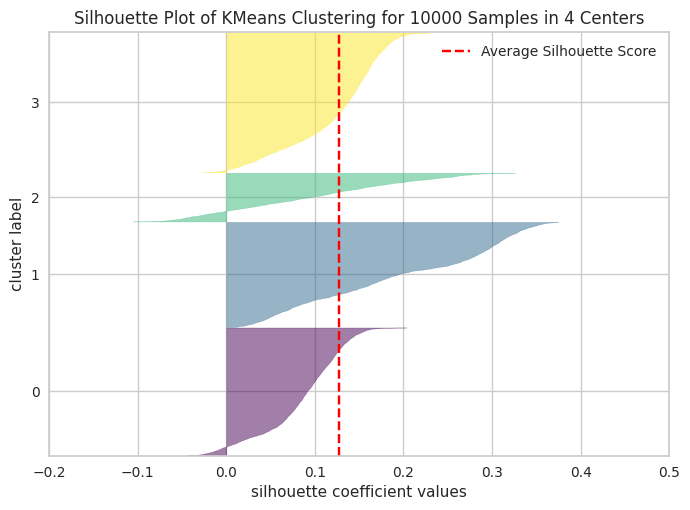



=== Silhouette plot for 5 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



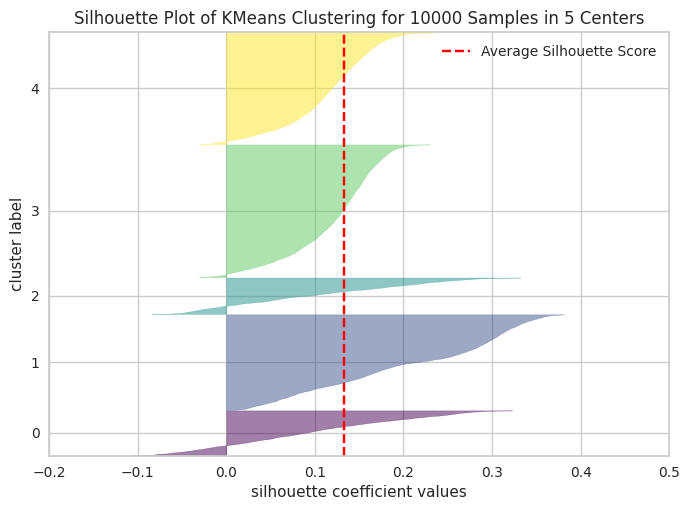



=== Silhouette plot for 6 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



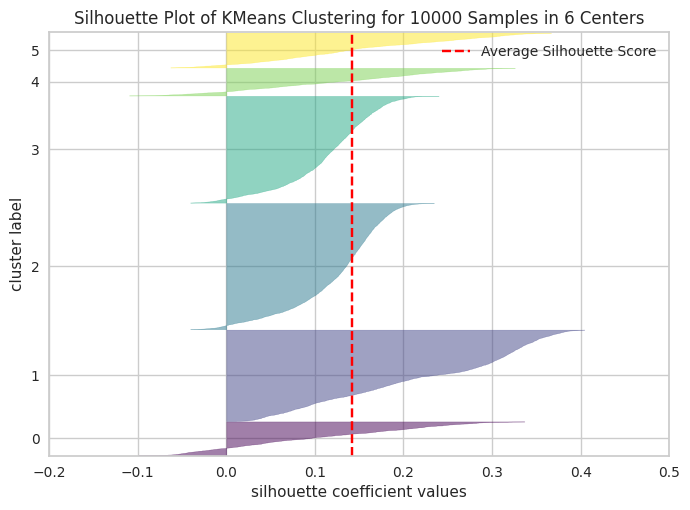



=== Silhouette plot for 7 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



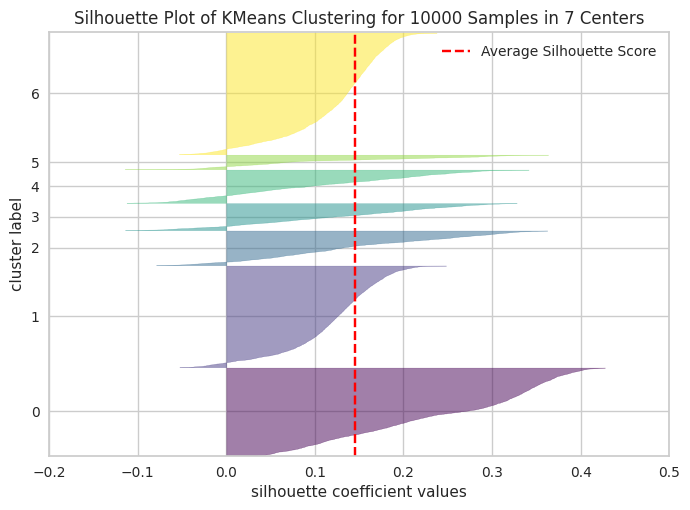



=== Silhouette plot for 8 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



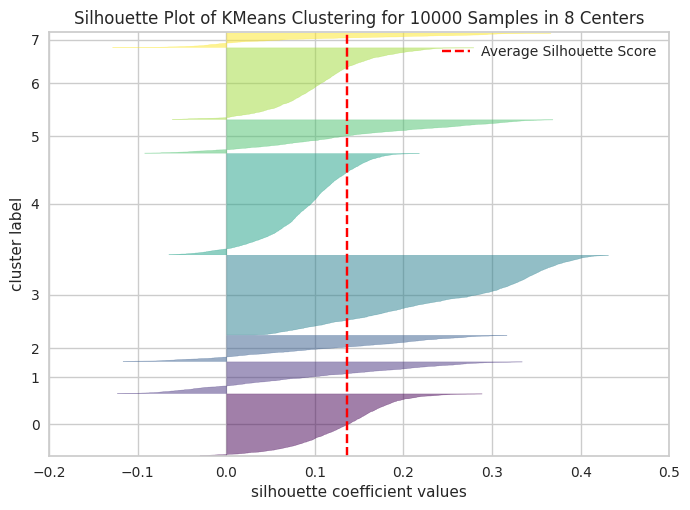



=== Silhouette plot for 9 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



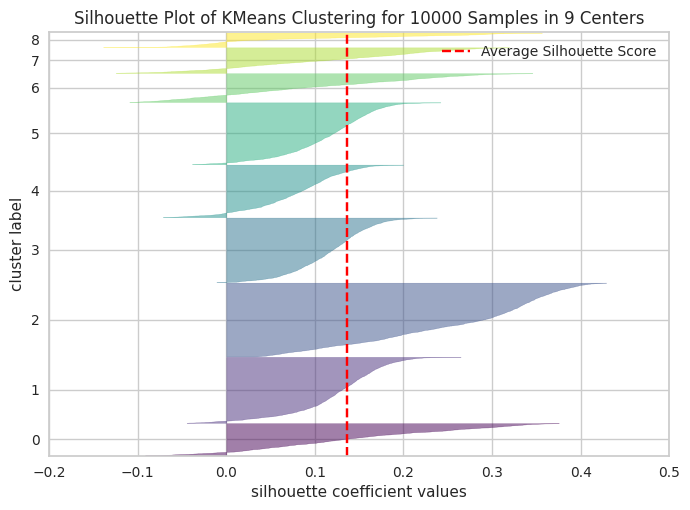



=== Silhouette plot for 10 Clusters ===


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



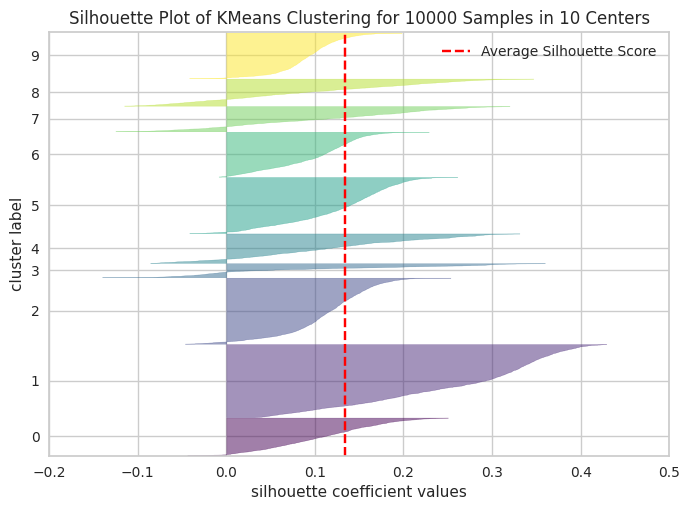

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

# Print message for the silhouette score analysis with KElbowVisualizer
print("=== Average Silhouette Score for different number of clusters ===")
# KElbowVisualizer: Uses silhouette score to find the optimal number of clusters between 2 and 7
visualizer = KElbowVisualizer(KMeans(random_state=77), k=(2,7), metric='silhouette')
# Fit the KMeans model to the transformed data
visualizer.fit(df_analysis)
# Display
visualizer.show()
plt.show()
print("\n")

# Lop over a range of cluster numbers (from 2 to 10) to plot the silhouette score for each case
for n_clusters in np.arange(start=2, stop=11):
    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    # Silhouettevisualizer: Plots the silhouette analysis for each cluster number
    # colors='yellowbrick' uses the predefined color palette by Yellowbrick
    visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=n_clusters, random_state=77), colors='viridis')
    # Fit the visualizer to the data
    visualizer.fit(df_analysis)
    # Display 
    visualizer.show()
    plt.show()
    print("\n")

Conclusion: 
* Elbow method says 5
* average silhouette score says 2
* the graphs say 4

we will go for the medium value: 5

In [52]:
def LuxuriusCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                variables=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc',
                                                        'LOCATION', 'Cross Street'])),
        ("scaler", StandardScaler()),
        ("PCA", PCA(n_components=11, random_state=77)),
        ("model", KMeans(n_clusters=5, random_state=77)),
    ])
    return pipeline_base

LuxuriusCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=11, random_state=77)),
                ('model', KMeans(n_clusters=5, random_state=77))])

# FIT CLUSTER PIPELINE

In [53]:
# Make a copy of our data
X = df.copy()
print(X.shape)
X.head(3)

(10000, 14)


,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount
0,2200,19,763,9,F,H,101.0,STREET,515.0,PHYSICAL PRESENCE,13500 SIMSHAW AV,NO CROSS STREET,6,0.0
1,1130,14,330,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0
2,2130,1,740,34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0


In [54]:
# Fit the cluster
pipeline_cluster = LuxuriusCluster()
pipeline_cluster.fit(X)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=11, random_state=77)),
                ('model', KMeans(n_clusters=5, random_state=77))])

In [55]:
#Add a column "Clusters" to the data
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(10000, 15)


,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Clusters
0,2200,19,763,9,F,H,101.0,STREET,515.0,PHYSICAL PRESENCE,13500 SIMSHAW AV,NO CROSS STREET,6,0.0,3
1,1130,14,330,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0,3
2,2130,1,740,34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0,3


* Clusters Frequencies:
          Frequency
Clusters           
3              0.32
4              0.26
1              0.23
0              0.11
2              0.09 



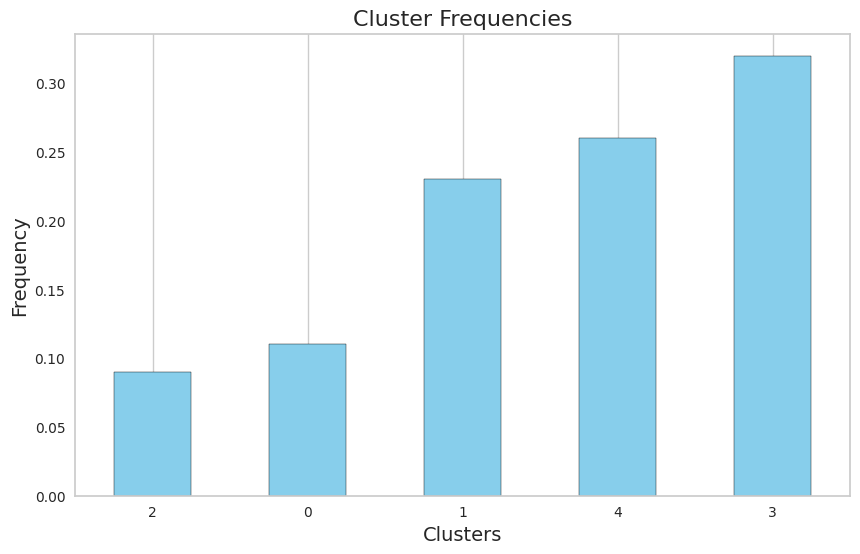

In [56]:
# Calculate cluster frequencies
cluster_counts = X['Clusters'].value_counts(normalize=True).round(2)
cluster_counts_df = cluster_counts.to_frame(name='Frequency')

# Print
print("* Clusters Frequencies:")
print(cluster_counts_df, "\n")

# Plot cluster frequencies as a bar chart
plt.figure(figsize=(10, 6))
cluster_counts.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labesl to the plot
plt.title('Cluster Frequencies', fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0) # Rotate x-tick labels for better readability
plt.grid(axis='y') # Add gridlines
plt.show()


## Learning each cluster's profile, based on the most relevant dataset variables

We will use 'Clusters' as the target for a classifier, and the remaining variables will be features for that target.
We will assume that the most relevant features for this classifier, will be the most relevant variables that define a cluster.

In [57]:
# Copy X to another DataFrame
df_classified = X.copy()
print(df_classified.shape)
df_classified.head(3)

(10000, 15)


,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Clusters
0,2200,19,763,9,F,H,101.0,STREET,515.0,PHYSICAL PRESENCE,13500 SIMSHAW AV,NO CROSS STREET,6,0.0,3
1,1130,14,330,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0,3
2,2130,1,740,34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0,3


In [58]:
# Spliting train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_classified.drop(['Clusters'], axis=1),
    df_classified['Clusters'],
    test_size=0.2,
    random_state=77
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 14) (8000,) (2000, 14) (2000,)


In [65]:
# Create a classifier pipeline
## Cleaning
from sklearn.impute import KNNImputer
## Selection
from sklearn.feature_selection import SelectFromModel
## ML aLgorithm
from sklearn.ensemble import GradientBoostingClassifier

def PipelineClassif2ExplainClusters():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                variables=['Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc',
                                                        'LOCATION', 'Cross Street'])),
        ('imputer', KNNImputer(n_neighbors=5)),
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(GradientBoostingClassifier(random_state=77))),
        ("model", GradientBoostingClassifier(random_state=77)),
    ])
    return pipeline_base

PipelineClassif2ExplainClusters()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=77))),
                ('model', GradientBoostingClassifier(random_state=77))])

### Do not deploy this model, only useful for the features that look to be more important to predict the Clusters. No detailed hyperparameter optimisation here.

In [66]:
pipeline_clf_cluster = PipelineClassif2ExplainClusters()
pipeline_clf_cluster.fit(X_train, y_train)

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=77))),
                ('model', GradientBoostingClassifier(random_state=77))])

## Evaluate the classifier performance on Train and Test Sets

 the classifier algorithm (GradientBoosting) would be able to map these relationships, in theory. So let's check that.

In [67]:
# Evaluating Train Set
from sklearn.metrics import classification_report
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       854
           1       0.96      0.94      0.95      1791
           2       0.92      0.88      0.90       701
           3       0.95      0.97      0.96      2531
           4       0.94      0.98      0.96      2123

    accuracy                           0.95      8000
   macro avg       0.95      0.93      0.94      8000
weighted avg       0.95      0.95      0.95      8000



In [68]:
# Evaluating Test Set
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/encoding/base_encoder.py:141: UserWarning:

NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories do not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.



              precision    recall  f1-score   support

           0       0.93      0.86      0.89       214
           1       0.93      0.95      0.94       480
           2       0.84      0.78      0.81       164
           3       0.95      0.96      0.96       620
           4       0.93      0.93      0.93       522

    accuracy                           0.93      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.93      0.93      0.93      2000



---

# Assess the Most important Features that define a cluster

In [69]:
pipeline_clf_cluster

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Vict Sex', 'Vict Descent',
                                           'Premis Desc', 'Weapon Desc',
                                           'LOCATION', 'Cross Street'])),
                ('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=77))),
                ('model', GradientBoostingClassifier(random_state=77))])

* These are the 5 most important features in descending order. The model was trainded on them: 
['Vict Sex', 'Weapon Used Cd', 'Premis Desc', 'Vict Age', 'Amount'] 



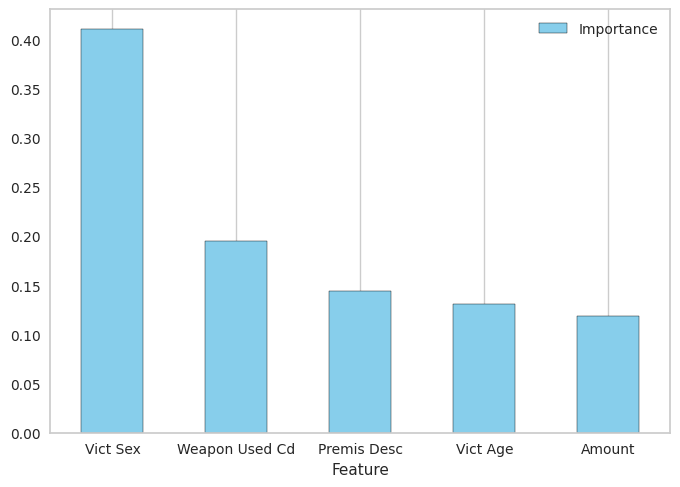

In [71]:
data_cleaning_feat_eng_steps = 1 # Step to limit the pipeline for data cleaning and feature engineering
# Apply the pipeline up to the data cleaning and feature engineering steps
# This uses only the first 'data_cleaning_feat_eng_steps' step(s) of the pipeline for transformation.
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf_cluster.steps[:data_cleaning_feat_eng_steps]).transform(X_train).columns) # Capture column names after the transformation
# Retrieve the names of the selected features from the 'feat_selection' step in the pipeline
best_features = columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()].to_list()
# Create a DataFrame to store the feature names and their importance scores
df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()],
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
.sort_values(by='Importance', ascending=False)
)
# Extract the sorted list of the most important features
best_features = df_feature_importance['Feature'].to_list()
# Print the most important features
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trainded on them: \n{best_features} \n")
# Plot a bar chart to visualize feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance', color='skyblue', edgecolor='black')
plt.xticks(rotation=0) # Rotate x-tick labels for better readability
plt.grid(axis='y') # Add gridlines
plt.show()

---

## Cluster Analysis

we will explain the cluster profile, in terms of **Weapon Desc**, **Vict Age**, **Vict Sex**. 
For each cluster, we want to know the most commun values for each variable.

In [87]:
# This function is based mainly on the course Scikit-Learn Unit 8
# Function to describe all clusters based on the most important variables: Weapon Desc, Vict Age, Vict Sex
def DescriptionAllClusters(df, decimal_points=3):
    """
    This function creates a summary table showing the most commun values for key variables 
    (weapon Desc, Vict Age, Vict Sex) across all clusters.
    
    Parameters:
    - df: The DataFrame containgin cluster data and the important variables.
    - decimal_points: The number of decimal places to display for numerical variables.

    Returns:
    - DescriptionAllClusers: A DataFrame with the most common values for each variable in each cluster.
    """
    # Create an empty DataFrame to store descriptions for all clusters
    DescriptionAllClusters = pd.DataFrame(columns=df.drop(['Clusters'], axis=1).columns)

    # Loop over each unique cluster
    for cluster in df.sort_values(by='Clusters')['Clusters'].unique():
        # Filter data for each cluster and drop the 'Clusters' column
        EDA_ClusterSubset = df.query(f"Clusters == {cluster}").drop(['Clusters'], axis=1)

        # Generate description for each cluster and append to the overall DAtaFrame
        ClusterDescription = Clusters_IndividualDescription(EDA_ClusterSubset, cluster, decimal_points)
        DescriptionAllClusters = pd.concat([DescriptionAllClusters, ClusterDescription], ignore_index=True)

    #Set 'Cluster' as the index for easy viewing of the data
    DescriptionAllClusters.set_index(['Cluster'], inplace=True)

    return DescriptionAllClusters

# Function to describe each individual cluster based on key variables
def Clusters_IndividualDescription(EDA_Cluster, cluster, decimal_points):
    """
    This function generates the description for a single cluster. It calculates either the range for numerical variables
    or the top 3 most common values for categorical variables.

    Parameters:
    - EDA_Cluster: The DataFrame containing the data for a specific cluster.
    - cluster: The current cluster number being processed.
    - decimal_points: The number of decimal places to display for numerical variables.

    Returns:
    - ClusterDescription: A DataFrame with the summary of the most commun values for each variable in this cluster.
    """

    # Create an empty DataFrame to store the description for the current cluster
    ClustersDescription = pd.DataFrame(columns=EDA_Cluster.columns)

    # Loop over each column (variable) in the cluster data
    for col in EDA_Cluster.columns:
        try:
            # For categorical variable like 'Weapon Desc' and 'Vict Sex'
            if EDA_Cluster[col].dtypes == 'object':
                # Get the top 3 most commn categories and their frequencies
                top_frequencies = EDA_Cluster.dropna(subset=[col])[[col]].value_counts(normalize=True).nlargest(n=3)
                Description = ''

                # Loop over the top 3 categories and create a summary string with their percentages
                for x in range(len(top_frequencies)):
                    freq = top_frequencies.iloc[x]
                    category = top_frequencies.index[x][0]
                    CategoryPercentage = int(round(freq * 100, 0))
                    statement = f"'{category}': {CategoryPercentage}% , "
                    Description = Description + statement
                
                # Add the description to the DataFrame for the current variable
                ClustersDescription.at[0, col] = Description[:-2] # Remove trailing comma and space
            
            # For numerical variables like 'Vict Age'
            elif EDA_Cluster[col].dtypes in ['float', 'int']:

                # Calculate the interquartile range (IQR) by using the 25th percentile (Q1) and 75th percentile (Q3)
                DescStats = EDA_Cluster.dropna(subset=[col])[[col]].describe()
                Q1 = round(DescStats.iloc[4, 0], decimal_points) # 25th percentile
                Q3 = round(DescStats.iloc[6, 0], decimal_points) # 75th percentile
                Description = f"{Q1} -- {Q3}" # Create a string showing the range

                # Add the description to the DataFrame for the current variable
                ClustersDescription.at[0, col] = Description
        
        # In case of any error (e.g., missing data for that variable in the cluster), mark the variable as 'Not available'
        except Exception as e:
            ClustersDescription.at[0, col] = 'Not available'
            print(f"** Error Exception: {e} - cluster {cluster}, variable {col}")

    # Add the cluster number as a new column
    ClustersDescription['Cluster'] = str(cluster)

    return ClustersDescription


In [88]:
import plotly.express as px

def cluster_distribution_per_variable(df, target):
    df_bar_plot = df.value_counts(["Clusters", target]).reset_index()
    df_bar_plot.columns = ['Clusters', target, 'Count']
    df_bar_plot[target] = df_bar_plot[target].astype('object')

    print(f"Clusters ditribution across {target} levels")
    fig = px.bar(df_bar_plot, x='Clusters', y='Count', color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=df['Clusters'].unique()))
    fig.show(renderer='jupyterlab')
    df_relative = (df.groupby(["Clusters", target]).size().groupby(level=0).apply(lambda x: 100*x / x.sum()).reset_index().sort_values(by=['Clusters']))
    df_relative.columns = ['Clusters', target, 'Relative Percentage (%)']
    print(f"Relative Percentage (%) of {target} in each cluster")
    fig = px.line(df_relative, x='Clusters', y='Relative Percentage (%)', color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=df['Clusters'].unique()))
    fig.update_traces(mode='markers+lines')
    fig.show(renderer='jupyterlab')

In [89]:
df_cluster_profile = df_classified.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
print(df_cluster_profile.shape)
df_cluster_profile.head(3)

(10000, 6)


,Vict Sex,Weapon Used Cd,Premis Desc,Vict Age,Amount,Clusters
0,F,515.0,STREET,9,0.0,3
1,F,999.0,STREET,32,2000.0,3
2,F,999.0,"VEHICLE, PASSENGER/TRUCK",34,900.0,3


In [90]:
# We analyase Damage level
df_damage = pd.read_csv("outputs/datasets/collection/dataPP5_cleaned_10k.csv").filter(['Damage'])
df_damage['Damage'] = df_damage['Damage'].astype('object')
df_damage.head(3)

,Damage
0,0
1,1
2,1


In [91]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df=pd.concat([df_cluster_profile, df_damage], axis=1), decimal_points=0)
clusters_profile

,Vict Sex,Weapon Used Cd,Premis Desc,Vict Age,Amount,Damage
Cluster,,,,,,
0,"'M': 65% , 'F': 27% , 'X': 8%",106.0 -- 311.0,"'STREET': 35% , 'SIDEWALK': 16% , 'SINGLE FAMILY DWELLING': 10%",23.0 -- 44.0,0.0 -- 2000.0,"'0': 72% , '1': 28%"
1,"'X': 76% , 'M': 15% , 'F': 9%",999.0 -- 999.0,"'STREET': 55% , 'PARKING LOT': 13% , 'OTHER BUSINESS': 9%",0.0 -- 0.0,10000.0 -- 20000.0,"'1': 97% , '0': 3%"
2,"'M': 46% , 'X': 31% , 'F': 23%",500.0 -- 999.0,"'MARKET': 6% , 'CLOTHING STORE': 6% , 'OFFICE BUILDING/OFFICE': 4%",0.0 -- 36.0,0.0 -- 2000.0,"'1': 62% , '0': 38%"
3,"'F': 97% , 'X': 3%",400.0 -- 999.0,"'SINGLE FAMILY DWELLING': 28% , 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 23% , 'STREET': 13%",26.0 -- 48.0,0.0 -- 950.0,"'0': 61% , '1': 39%"
4,"'M': 99% , 'X': 1%",511.0 -- 999.0,"'SINGLE FAMILY DWELLING': 24% , 'STREET': 17% , 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 15%",30.0 -- 54.0,0.0 -- 2000.0,"'1': 57% , '0': 43%"


---

# Saving work

### The pipeline

In [93]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/cluster_analysis/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [96]:
LuxuriusCluster
joblib.dump(value=LuxuriusCluster, filename=f"{file_path}/LuxuriusCluster.pkl")


['outputs/ml_pipeline/cluster_analysis/v1/LuxuriusCluster.pkl']

### Best features

In [99]:
import joblib
import os

version = 'v1'
file_path = f'outputs/pictures/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

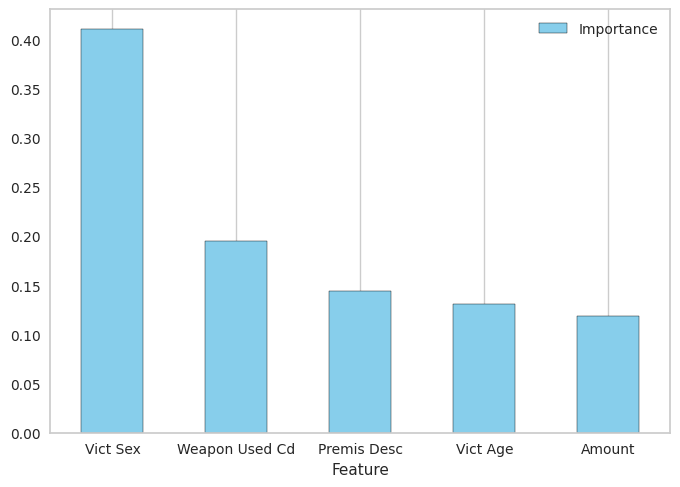

<Figure size 800x550 with 0 Axes>

In [100]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance', color='skyblue', edgecolor='black')
plt.xticks(rotation=0) # Rotate x-tick labels for better readability
plt.grid(axis='y') # Add gridlines
plt.show()
plt.savefig(f"{file_path}/best_features.png", bbox_inches='tight', dpi=150)

### Elbow method

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

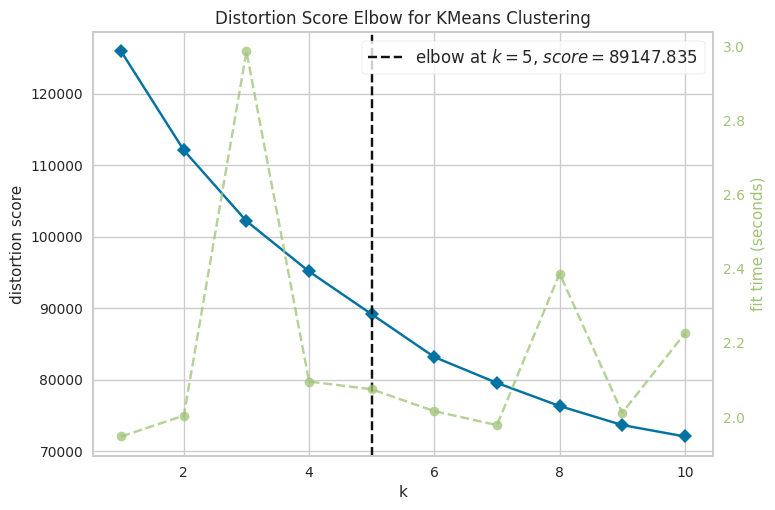

<Figure size 800x550 with 0 Axes>

In [103]:
visualizer = KElbowVisualizer(KMeans(random_state=77), k=(1,11))
visualizer.fit(df_analysis)
#visualizer.show()
plt.show()
plt.savefig(f"{file_path}/elbow_method.png", bbox_inches='tight', dpi=150)

### Silhouette Score

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



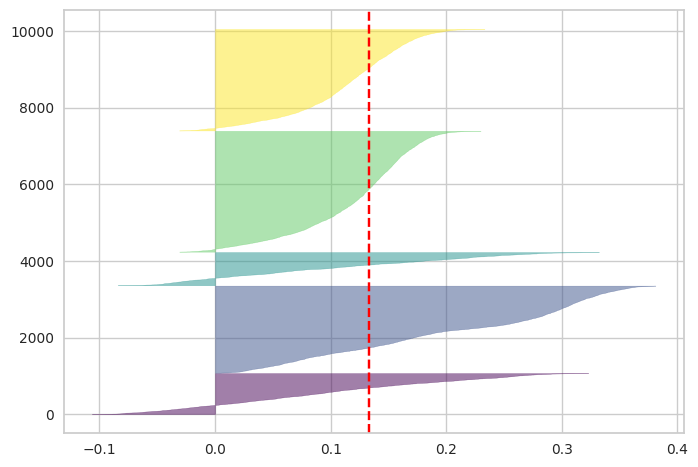

<Figure size 800x550 with 0 Axes>

In [105]:
    visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=5, random_state=77), colors='viridis')
    # Fit the visualizer to the data
    visualizer.fit(df_analysis)
    # Display 
    #visualizer.show()
    plt.show()
    plt.savefig(f"{file_path}/silhouette_score.png", bbox_inches='tight', dpi=150)


### Cluster_profile

In [106]:
import joblib
import os

version = 'v1'
file_path = f'outputs/datasets/other/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [108]:
clusters_profile.to_csv(f"{file_path}/clusters_profile.csv")